# Global plastic usage: future impact awareness

importing the library to start analyzing the dataset:

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
dataset= pd.read_csv("per-capita-plastic-waste-vs-gdp-per-capita.csv")

In [3]:
print("The data set has {} rows and {} columns".format(dataset.shape[0], dataset.shape[1]))
display(dataset.describe())
display(dataset.head())
display(dataset.dtypes.value_counts())

The data set has 48168 rows and 7 columns


,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)"
count,48168.000000,186.000000,6407.000000,4.688300e+04
mean,1903.147442,0.179812,14926.095591,2.982790e+07
std,315.716839,0.123006,17739.754531,2.530860e+08
min,-10000.000000,0.010000,247.436540,9.050000e+02
25%,1859.000000,0.103000,3021.071807,2.017335e+05
50%,1920.000000,0.144000,8447.264179,1.542937e+06
75%,1975.000000,0.252000,19607.537075,5.886795e+06
max,2019.000000,0.686000,135318.754421,7.713468e+09


,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


object     3
float64    3
int64      1
Name: count, dtype: int64

In [4]:
dataset.shape

(48168, 7)

 To have summary of the dataset with the informations about the types in each column, how many non-null values I use the function info()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


It needs to be checked how are our values into the dataset, are them object? integers? Float? to do so we will use the function .dtypes. This step helps to understand which type of values we are having in our dataset to be considered and if needed any additional action:

In [6]:
dataset.dtypes

Entity                                                  object
Code                                                    object
Year                                                     int64
Per capita plastic waste (kg/person/day)               float64
GDP per capita, PPP (constant 2011 international $)    float64
Total population (Gapminder, HYDE & UN)                float64
Continent                                               object
dtype: object

In [7]:
dataset.head(300)

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
...,...,...,...,...,...,...,...
295,Africa,NaN,1972,NaN,NaN,382838016.0,NaN
296,Africa,NaN,1973,NaN,NaN,393044000.0,NaN
297,Africa,NaN,1974,NaN,NaN,403646016.0,NaN
298,Africa,NaN,1975,NaN,NaN,414675008.0,NaN


Noticing that the columns are having brackets for convinience they are renamed: 

In [8]:
dataset.rename(columns={'Per capita plastic waste (kg/person/day)': 'capita plastic waste'}, inplace=True)

In [9]:
dataset.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita'}, inplace=True)

In [10]:
dataset.rename(columns={'Total population (Gapminder, HYDE & UN)': 'Total population'}, inplace=True)

The dataset could have duplicated value. With the following function it if they are duplicates or not: 

In [11]:
dataset.duplicated().sum() 

0

In order to proceed with the data cleaning it needs to be showed the missing values present for each column with the function isnull().sum()

In [12]:
dataset.isnull().sum()

Entity                      0
Code                     2014
Year                        0
capita plastic waste    47982
GDP per capita          41761
Total population         1285
Continent               47883
dtype: int64

Entity and year have 0 missing value but the others have quite a lot. To check the total in the dataset of the missing value it is used the following function: 

In [13]:
dataset.isnull().sum().sum()

140925

In [14]:
dataset.head()

,Entity,Code,Year,capita plastic waste,GDP per capita,Total population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


# Visualization of missing values

Importing the Python library "missingno"  helps to visualize and analyze missing data in the datasets. it allows to  quickly understand and visualize missing values:

In [15]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


To identity the location of the missing data within the dataset it has been used the matric plot:

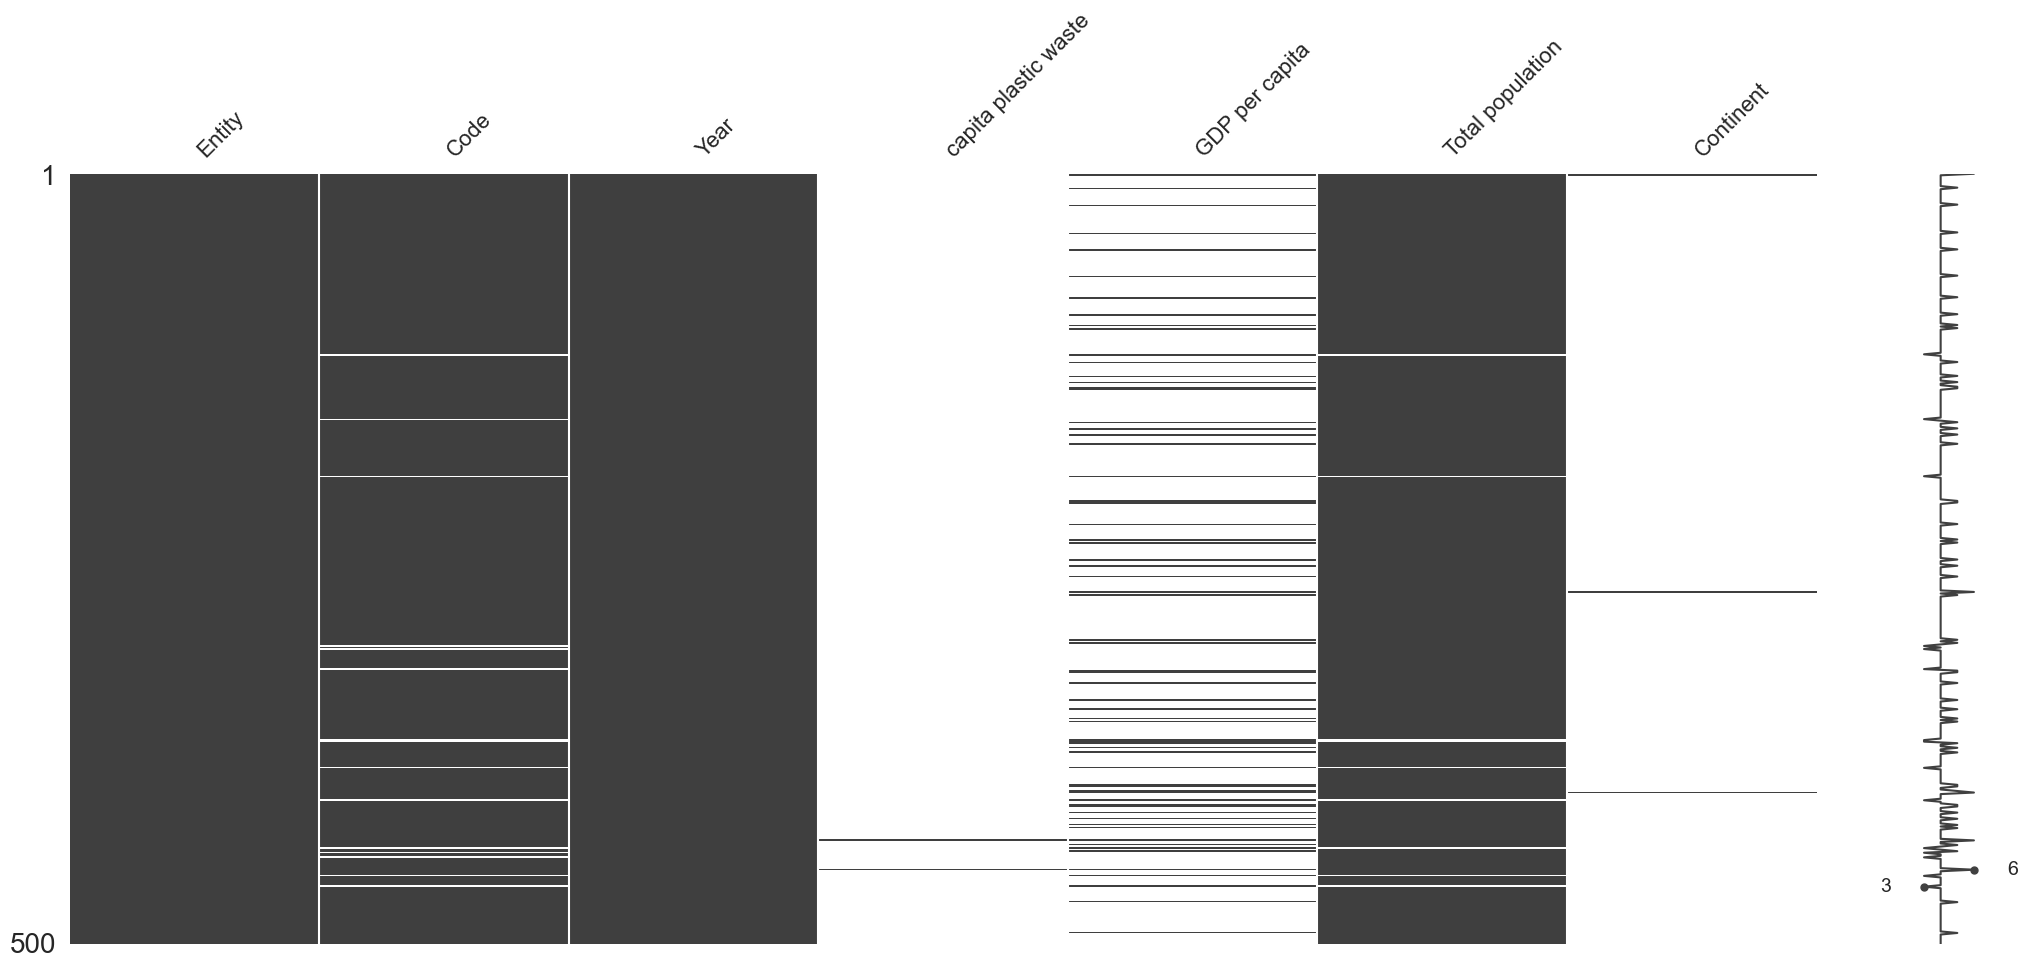

In [16]:
import missingno as msno

ax = msno.matrix(dataset.sample(500))

The heatmap shows the correlation between missing values across different columns. This help understand the relationship inside the missing values inside different columns, if there is any: 

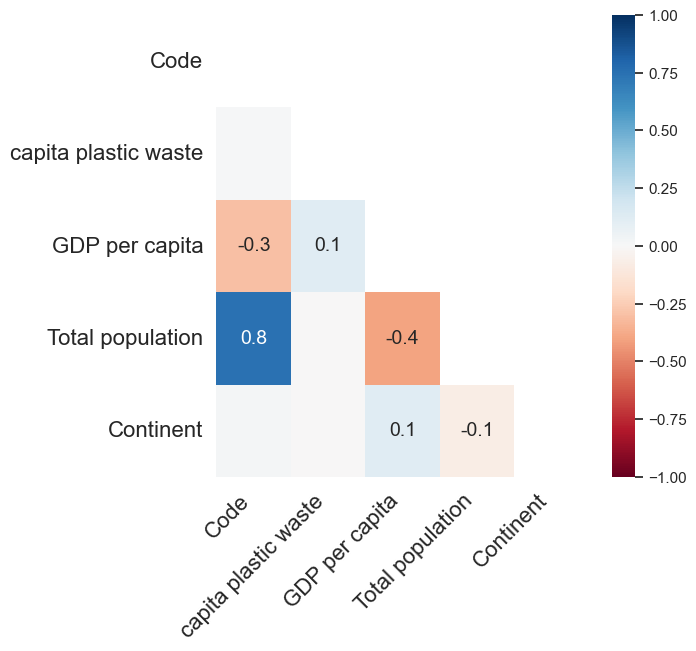

In [17]:
ax = msno.heatmap(dataset, figsize=(6, 6))

Thanks to the dendrogram it is identified groups of columns that have similar patterns of the missing value:

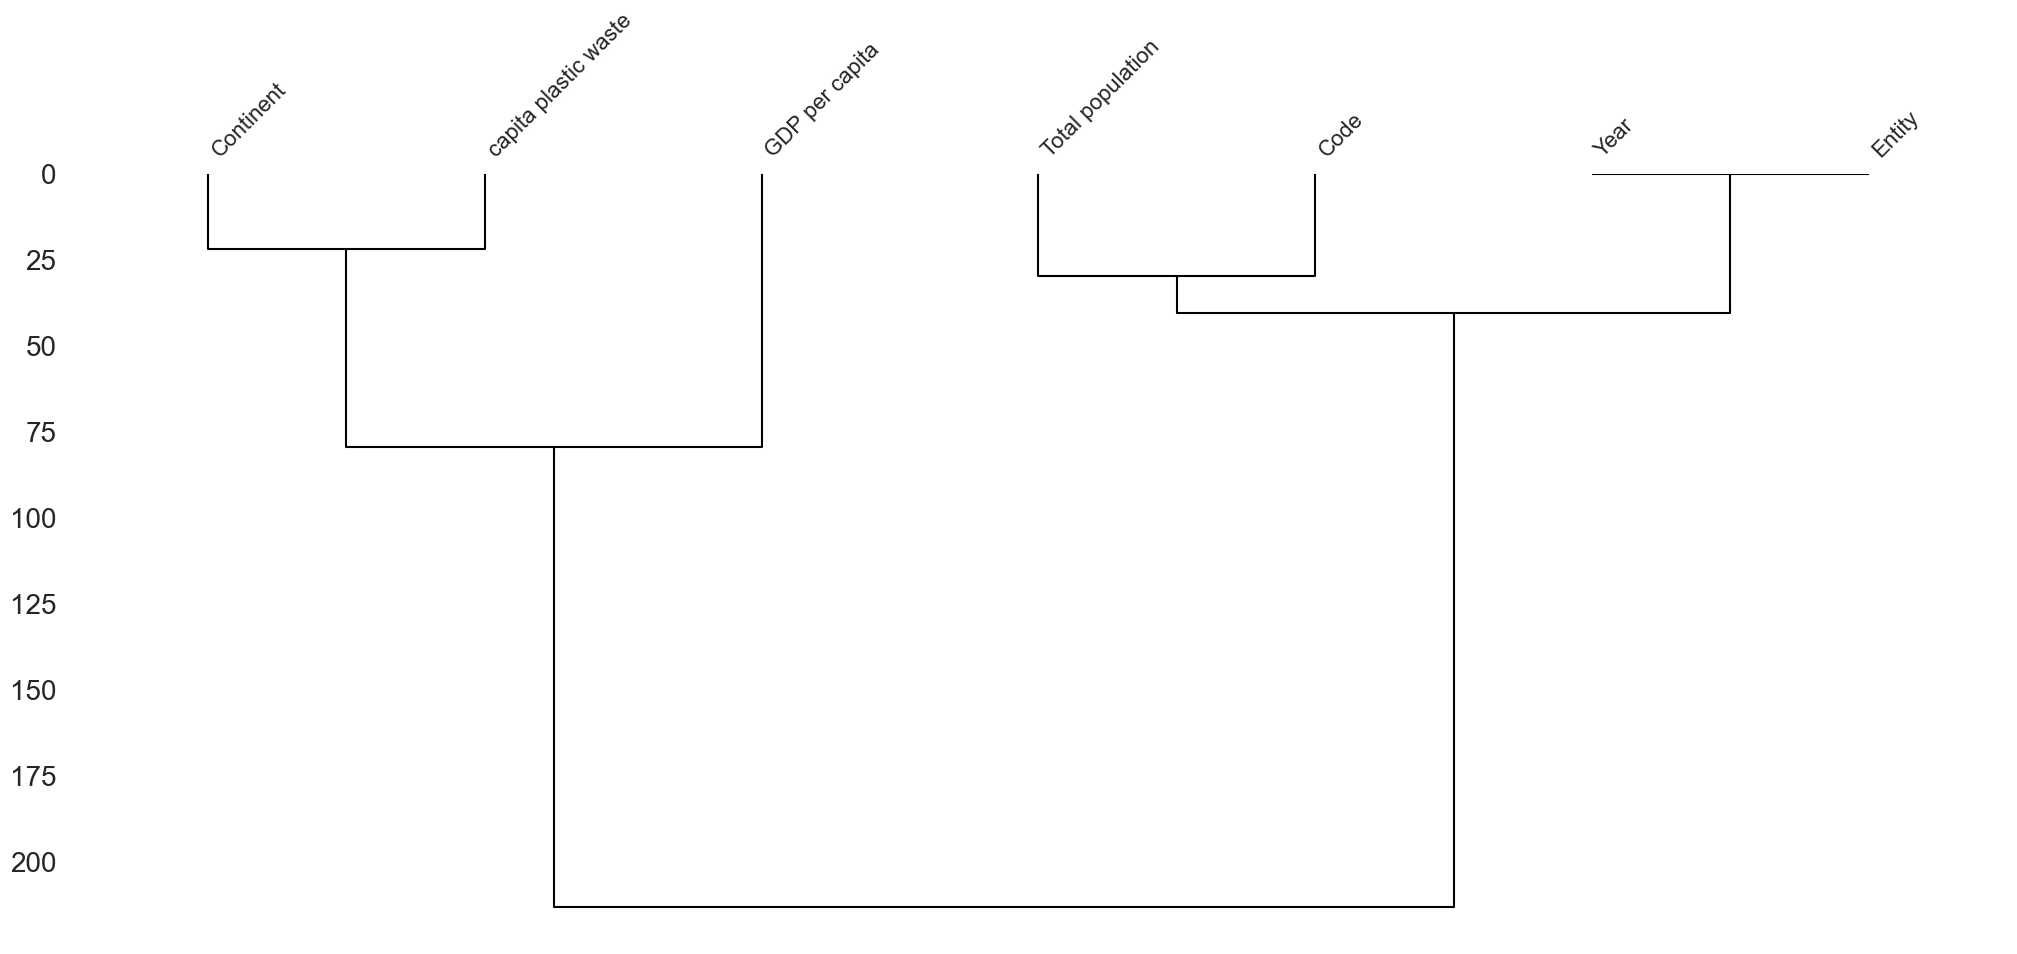

In [18]:
ax = msno.dendrogram(dataset)

# Visualization:

Visualization in this point it is cruciual to see the pattern and understand the dataset before start working on the missing values of the dataset. This is important to see the categorical values and have a general overview of the situation

In [19]:
print(dataset['Continent'])

0          Asia
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
48163       NaN
48164       NaN
48165       NaN
48166       NaN
48167    Europe
Name: Continent, Length: 48168, dtype: object


The continent it is an imput variable in the analysis due that the final scope of the project is to show the global plastic usage to bring awareness for future years. The pie chart shows the distribution of the data based on the "Continent" column:

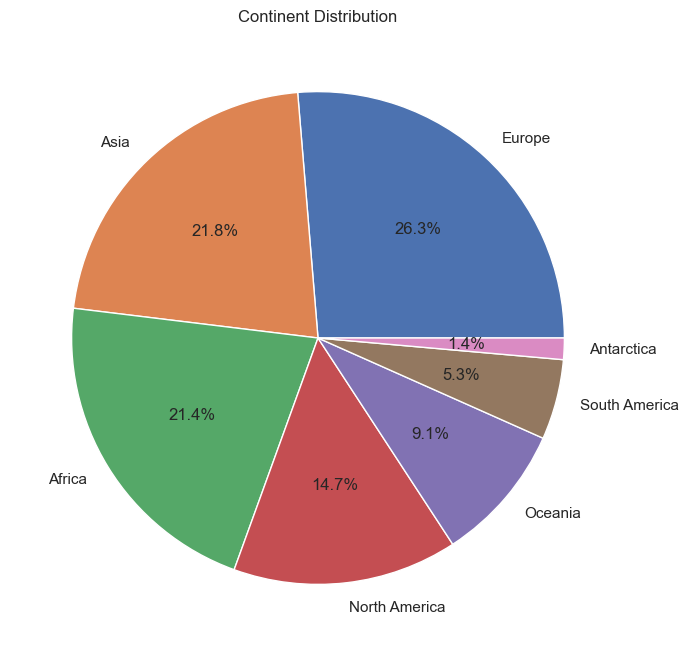

In [20]:
continent_counts = dataset['Continent'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%')
plt.title('Continent Distribution')
plt.show()

it is noticable that Africa, Asia and Europe are the majority of the analysis in the research.

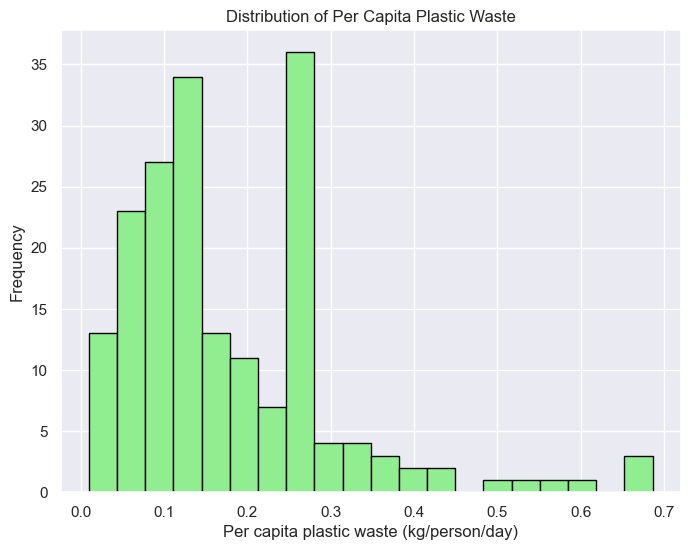

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(dataset['capita plastic waste'], bins=20, color='lightgreen', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Per Capita Plastic Waste')
plt.xlabel('Per capita plastic waste (kg/person/day)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Handling Missing Values:

In [22]:
missing_values=["NA","N/A","-","NaN","missing","na","?"]

In [23]:
dataset.head()

,Entity,Code,Year,capita plastic waste,GDP per capita,Total population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
cn1 = list(dataset['Entity'].values)
le.fit(list(set(cn1)))
num_cn1 = list(le.transform(cn1))
dataset['Entity'] = num_cn1

le = LabelEncoder()
cn2 = list(dataset['Code'].values)
le.fit(list(set(cn2)))
num_cn2 = list(le.transform(cn2))
dataset['Code'] = num_cn2

le = LabelEncoder()
cn3 = list(dataset['Continent'].values)
le.fit(list(set(cn3)))
num_cn3 = list(le.transform(cn3))
dataset['Continent'] = num_cn3

I don't want to fill every column with the median due that for example the year is not necessary to fill the year and Entity because the missing value are 0

In [26]:
columns_to_fill = ['Code', 'capita plastic waste', 'GDP per capita', 'Total population', 'Continent']

dataset[columns_to_fill] = dataset[columns_to_fill].fillna(dataset[columns_to_fill].median())

In [27]:
dataset.head()

,Entity,Code,Year,capita plastic waste,GDP per capita,Total population,Continent
0,0,173,2015,0.144,8447.264179,1542937.0,2
1,1,1,2002,0.144,1063.635574,22601000.0,7
2,1,1,2003,0.144,1099.194507,23681000.0,7
3,1,1,2004,0.144,1062.249360,24727000.0,7
4,1,1,2005,0.144,1136.123214,25654000.0,7


In [28]:
dataset.isnull().sum()

Entity                  0
Code                    0
Year                    0
capita plastic waste    0
GDP per capita          0
Total population        0
Continent               0
dtype: int64

change from float into Integer:

In [29]:
correlation_matrix = dataset.corr()
print(correlation_matrix['capita plastic waste'].sort_values(ascending=False))

capita plastic waste    1.000000
GDP per capita          0.067068
Year                    0.005894
Continent               0.001249
Entity                 -0.000227
Total population       -0.003892
Code                   -0.004517
Name: capita plastic waste, dtype: float64


<Axes: >

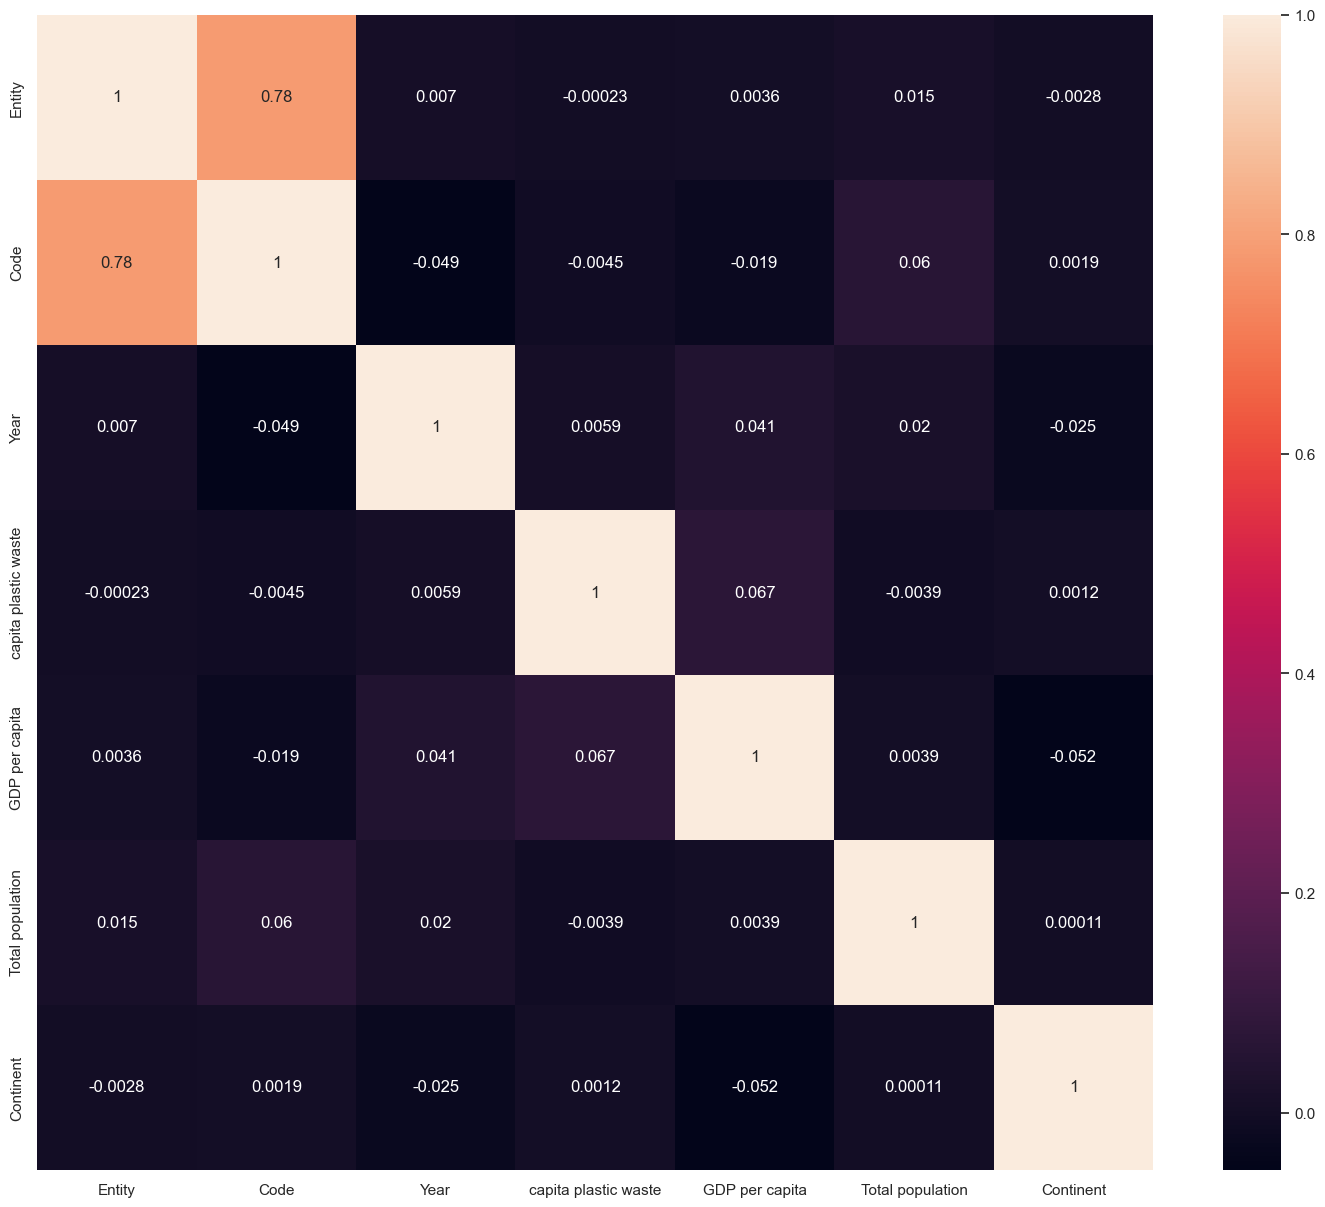

In [30]:
plt.figure(figsize = (18,15))
sns.heatmap(dataset.corr() , annot = True)

# Modelling: 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

splitting 10%

In [32]:
X = dataset.drop('capita plastic waste', axis=1)
y = dataset['Continent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.9960556362881462
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00      4798

    accuracy                           1.00      4817
   macro avg       0.14      0.14      0.14      4817
weighted avg       0.99      1.00      0.99      4817



C:\Users\cristinap\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cristinap\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cristinap\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision

In [34]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9997924019099025
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.75      1.00      0.86         3
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00      4798

    accuracy                           1.00      4817
   macro avg       0.96      0.98      0.97      4817
weighted avg       1.00      1.00      1.00      4817



In [35]:
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Random Forest Accuracy:", accuracy_rf)

Logistic Regression Accuracy: 0.9960556362881462
Random Forest Accuracy: 0.9997924019099025


testing the accuracy  of the model they are equally perfoming

Application of Decison tree model:

In [36]:
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [37]:
# split dataset in features and target variable
feature_cols = ['capita plastic waste']
X = dataset[feature_cols]               # Features of the dataset
y = dataset['Continent']                      # Target variable of the dataset

# Display the X and y arrays
print(X, y)

       capita plastic waste
0                     0.144
1                     0.144
2                     0.144
3                     0.144
4                     0.144
...                     ...
48163                 0.144
48164                 0.144
48165                 0.144
48166                 0.144
48167                 0.144

[48168 rows x 1 columns] 0        2
1        7
2        7
3        7
4        7
        ..
48163    7
48164    7
48165    7
48166    7
48167    3
Name: Continent, Length: 48168, dtype: int32


training split of 10%

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1) 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9929416649366826
Accuracy: 0.99


trainign split of 20%

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9938758563421216
Accuracy: 0.99


30%

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9939796553871705
Accuracy: 0.99


Random Forest:

In [41]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = dataset[['capita plastic waste']]  # Features
y = dataset['Continent']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 5) 

In [42]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_RF = RandomForestClassifier(n_estimators = 1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [43]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.995640440107951
Accuracy: 1.00


20%

In [44]:
X = dataset[['capita plastic waste']]  # Features
y = dataset['Continent']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 5) 

In [45]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_RF = RandomForestClassifier(n_estimators = 1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [46]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9943948515673656
Accuracy: 0.99


In [47]:
X = dataset[['capita plastic waste']]  # Features
y = dataset['Continent']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 5) 

In [48]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_RF = RandomForestClassifier(n_estimators = 1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [49]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9941180541139022
Accuracy: 0.99
